<a href="https://colab.research.google.com/github/MayraSSQ/PrediccionDemandaTransportePublico---Metropolitano---Redes-Neuronales/blob/main/TFM01_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicaci√≥n de Redes Neuronales en la Predicci√≥n de la Demanda de Transporte P√∫blico en Entornos Urbanos: Caso del Metropolitano de Lima**

# EDA

In [1]:
# INSTALAR LIBRER√çAS NECESARIAS (si no est√°n ya instaladas)
#!pip install matplotlib seaborn pandas statsmodels --quiet

# IMPORTAR LIBRER√çAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# CONFIGURAR ESTILO
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# SUBIR ARCHIVO
from google.colab import files
uploaded = files.upload()

# LEER CSV
df = pd.read_csv(next(iter(uploaded)))

# LIMPIEZA B√ÅSICA
df['estacion'] = df['estacion'].str.strip().str.lower()
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')

# Crear columna de d√≠a de semana num√©rico (lunes=0, domingo=6)
df['dia_semana_num'] = df['fecha'].dt.dayofweek

Saving Datos_final.csv to Datos_final.csv


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   estacion                   40432 non-null  object        
 1   fecha                      40432 non-null  datetime64[ns]
 2   validaciones               40432 non-null  int64         
 3   Dia de Semana              40432 non-null  object        
 4   anio                       40432 non-null  int64         
 5   mes                        40432 non-null  int64         
 6   dia                        40432 non-null  int64         
 7   semana_del_anio            40432 non-null  int64         
 8   es_finde                   40432 non-null  int64         
 9   mes_sin                    40432 non-null  float64       
 10  mes_cos                    40432 non-null  float64       
 11  dia_semana_num             40432 non-null  int32         
 12  dia_

In [4]:
df.describe()

fecha  validaciones          anio           mes  \
count                40432  40432.000000  40432.000000  40432.000000   
mean   2022-06-16 12:00:00   6481.826153   2021.970865      6.366541   
min    2021-01-01 00:00:00      0.000000   2021.000000      1.000000   
25%    2021-09-23 18:00:00   1642.000000   2021.000000      3.000000   
50%    2022-06-16 12:00:00   3563.000000   2022.000000      6.000000   
75%    2023-03-09 06:00:00   7165.000000   2023.000000      9.000000   
max    2023-11-30 00:00:00  92602.000000   2023.000000     12.000000   
std                    NaN  10498.509954      0.810014      3.366876   

                dia  semana_del_anio      es_finde       mes_sin  \
count  40432.000000     40432.000000  40432.000000  4.043200e+04   
mean      15.712406        25.882519      0.285714 -5.537880e-03   
min        1.000000         1.000000      0.000000 -1.000000e+00   
25%        8.000000        13.000000      0.000000 -8.660254e-01   
50%       16.000000        26.000000      0.000000  1.220000e-16   
75%       23.000000        38.250000      1.000000  8.660254e-01   
max       31.000000        53.000000      1.000000  1.000000e+00   
std        8.791872        14.706720      0.451760  7.158457e-01   

            mes_cos  dia_semana_num  dia_semana_sin  dia_semana_cos  \
count  4.043200e+04    40432.000000    4.043200e+04    4.043200e+04   
mean  -3.157714e-02        3.000000   -1.570656e-18    1.922131e-19   
min   -1.000000e+00        0.000000   -9.749279e-01   -9.009689e-01   
25%   -8.660254e-01        1.000000   -7.818315e-01   -9.009689e-01   
50%   -1.840000e-16        3.000000    0.000000e+00   -2.225209e-01   
75%    5.000000e-01        5.000000    7.818315e-01    6.234898e-01   
max    1.000000e+00        6.000000    9.749279e-01    1.000000e+00   
std    6.975399e-01        2.000025    7.071155e-01    7.071155e-01   

            feriado  vacaciones_escolares  vacaciones_universitarias  \
count  40432.000000          40432.000000               40432.000000   
mean       0.031955              0.284774                   0.336466   
min        0.000000              0.000000                   0.000000   
25%        0.000000              0.000000                   0.000000   
50%        0.000000              0.000000                   0.000000   
75%        0.000000              1.000000                   1.000000   
max        1.000000              1.000000                   1.000000   
std        0.175882              0.451313                   0.472506   

            eventos  
count  40432.000000  
mean       0.039474  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  
std        0.194721

In [89]:
# LIMPIEZA PREVIA DE D√çAS DE LA SEMANA
df['Dia de Semana'] = df['Dia de Semana'].str.lower().str.strip()
correccion_dias = {'miercoles': 'mi√©rcoles', 'sabado': 's√°bado'}
df['Dia de Semana'] = df['Dia de Semana'].replace(correccion_dias)

Valores nulos por columna:
estacion                     0
fecha                        0
validaciones                 0
Dia de Semana                0
anio                         0
mes                          0
dia                          0
semana_del_anio              0
es_finde                     0
mes_sin                      0
mes_cos                      0
dia_semana_num               0
dia_semana_sin               0
dia_semana_cos               0
feriado                      0
vacaciones_escolares         0
vacaciones_universitarias    0
Zona_geografica              0
eventos                      0
tipo_evento                  0
dtype: int64

Registros duplicados: 0


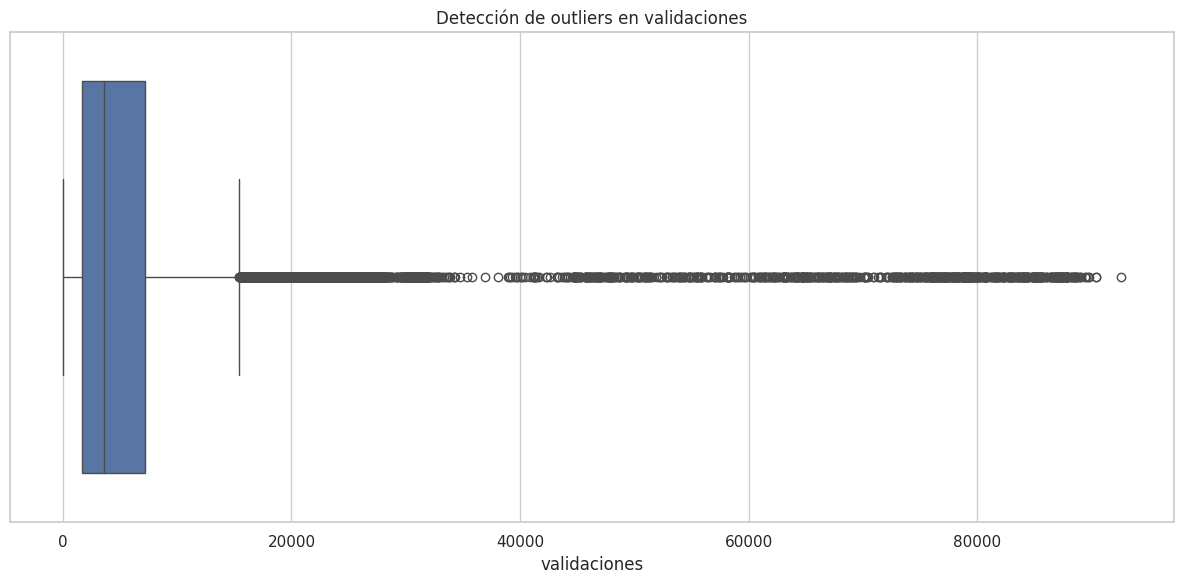

In [90]:
# ====================
# 1. VALORES NULOS
# ====================
print("Valores nulos por columna:")
print(df.isnull().sum())

# ====================
# 2. DUPLICADOS
# ====================
duplicados = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicados}")

# ====================
# 3. VALORES AT√çPICOS (Outliers en validaciones)
# ====================
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['validaciones'])
plt.title("Detecci√≥n de outliers en validaciones")
plt.tight_layout()
plt.show()

En esta gr√°fica podemos observar que, estad√≠sticamente, existen numerosos valores considerados at√≠picos. Sin embargo, en el contexto operativo del Metropolitano, esta dispersi√≥n es esperada debido a las diferencias de demanda entre estaciones de alta y baja afluencia. Por tanto, no se aplicaron correcciones autom√°ticas sobre estos valores altos. El an√°lisis de calidad se enfoc√≥ exclusivamente en detectar registros anormalmente bajos ‚Äîcomo validaciones menores a 100‚Äî, evaluando cada caso seg√∫n feriados, eventos o fines de semana, con el objetivo de preservar la estructura natural de la serie temporal.

In [91]:
# Filtrar registros con validaciones MUY bajas (menores a 100)
valores_muy_bajos = df[df['validaciones'] < 100]

print(f"Registros con validaciones menores a 100: {len(valores_muy_bajos)}")

# Mostrar los primeros casos
valores_muy_bajos[['fecha', 'estacion', 'validaciones', 'Dia de Semana', 'feriado', 'eventos']]


Registros con validaciones menores a 100: 3386


fecha   estacion  validaciones Dia de Semana  feriado  eventos
240   2021-08-29  2 de mayo             0       domingo        0        0
241   2021-08-30  2 de mayo             0         lunes        1        0
242   2021-08-31  2 de mayo             0        martes        0        0
243   2021-09-01  2 de mayo             0     mi√©rcoles        0        0
244   2021-09-02  2 de mayo             0        jueves        0        1
...          ...        ...           ...           ...      ...      ...
40307 2023-07-29        uni             0        s√°bado        1        0
40315 2023-08-06        uni             0       domingo        0        0
40339 2023-08-30        uni             0     mi√©rcoles        1        0
40378 2023-10-08        uni             0       domingo        1        0
40402 2023-11-01        uni             0     mi√©rcoles        1        0

[3386 rows x 6 columns]

In [92]:
# Filtrar registros menores a 100 validaciones
valores_pequenos = df[df['validaciones'] < 100]

# Agrupar por estaci√≥n y valor de validaciones
agrupado_detallado = valores_pequenos.groupby(['estacion', 'validaciones']).agg(
    cantidad=('validaciones', 'count'),
    cantidad_feriados=('feriado', 'sum'),
    cantidad_eventos=('eventos', 'sum'),
    cantidad_fines_de_semana=('Dia de Semana', lambda x: (x.isin(['s√°bado', 'domingo'])).sum())
).reset_index()

# Mostrar
agrupado_detallado.sort_values(['estacion', 'validaciones'])


estacion  validaciones  cantidad  cantidad_feriados  cantidad_eventos  \
0     2 de mayo             0        87                 13                14   
1     2 de mayo             1         1                  0                 0   
2   28 de julio             0        86                 13                14   
3   28 de julio             2         1                  0                 0   
4       angamos             0        85                 13                14   
..          ...           ...       ...                ...               ...   
94        teran            65         1                  0                 0   
95  tomas valle             0        85                 13                14   
96  tomas valle             1         2                  0                 0   
97          uni             0        86                 13                14   
98          uni             1         1                  0                 0   

    cantidad_fines_de_semana  
0                         27  
1                          1  
2                         27  
3                          0  
4                         26  
..                       ...  
94                         1  
95                        26  
96                         1  
97                        27  
98                         0  

[99 rows x 6 columns]

In [93]:
# Crear una copia para trabajar
df_imputado = df.copy()

# Filtrar registros con validaciones menores a 100
a_imputar = df_imputado[df_imputado['validaciones'] < 100]

print(f"Registros con validaciones menores a 100 que ser√°n imputados: {len(a_imputar)}")

# Calcular promedio de validaciones por estaci√≥n y d√≠a de semana, considerando d√≠as normales (validaciones >= 100)
dias_normales = df_imputado[df_imputado['validaciones'] >= 100]

promedio_por_estacion_dia = dias_normales.groupby(['estacion', 'Dia de Semana'])['validaciones'].mean().reset_index()
promedio_por_estacion_dia.rename(columns={'validaciones': 'promedio_estacion_dia'}, inplace=True)

# Unir el promedio al dataframe original
df_imputado = df_imputado.merge(promedio_por_estacion_dia, on=['estacion', 'Dia de Semana'], how='left')

# Imputar: donde validaciones < 100, poner promedio_estacion_dia
df_imputado['validaciones_final'] = df_imputado.apply(
    lambda row: row['promedio_estacion_dia'] if row['validaciones'] < 100 else row['validaciones'],
    axis=1
)

# Eliminar columnas auxiliares si deseas
df_imputado = df_imputado.drop(columns=['promedio_estacion_dia'])

print("Imputaci√≥n completada. Ahora tu columna limpia es 'validaciones_final'.")


Registros con validaciones menores a 100 que ser√°n imputados: 3386
Imputaci√≥n completada. Ahora tu columna limpia es 'validaciones_final'.


Tras analizar el contexto operativo del sistema Metropolitano de Lima y confirmar que no se registraron interrupciones del servicio ni durante feriados ni durante eventos sociales, se decidi√≥ imputar todos los registros con validaciones menores a 100. La imputaci√≥n se realiz√≥ utilizando el promedio de validaciones correspondiente a cada estaci√≥n y d√≠a de la semana, calculado a partir de d√≠as normales. Esta estrategia garantiz√≥ la coherencia y continuidad de las series temporales para su posterior modelado predictivo.

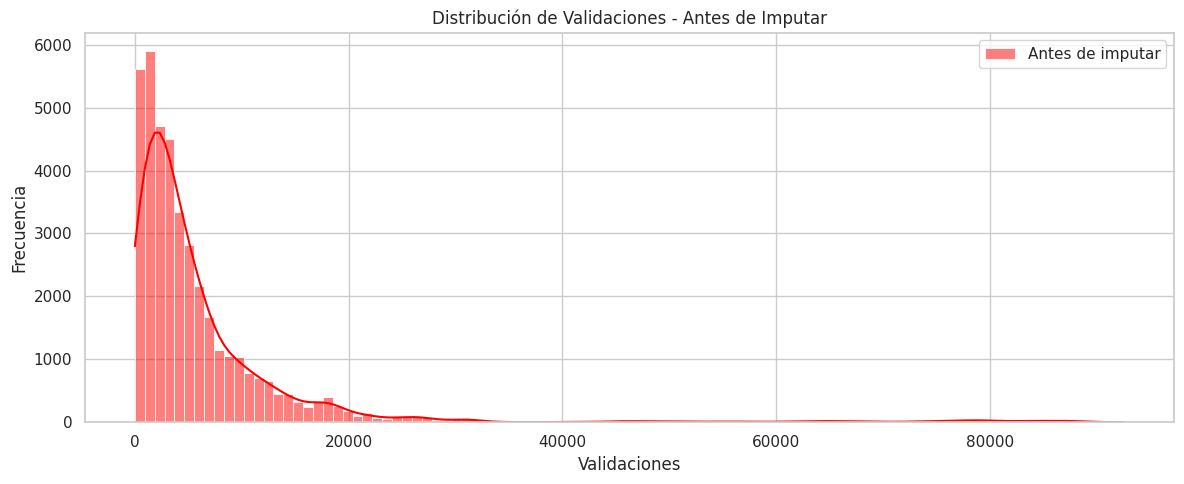

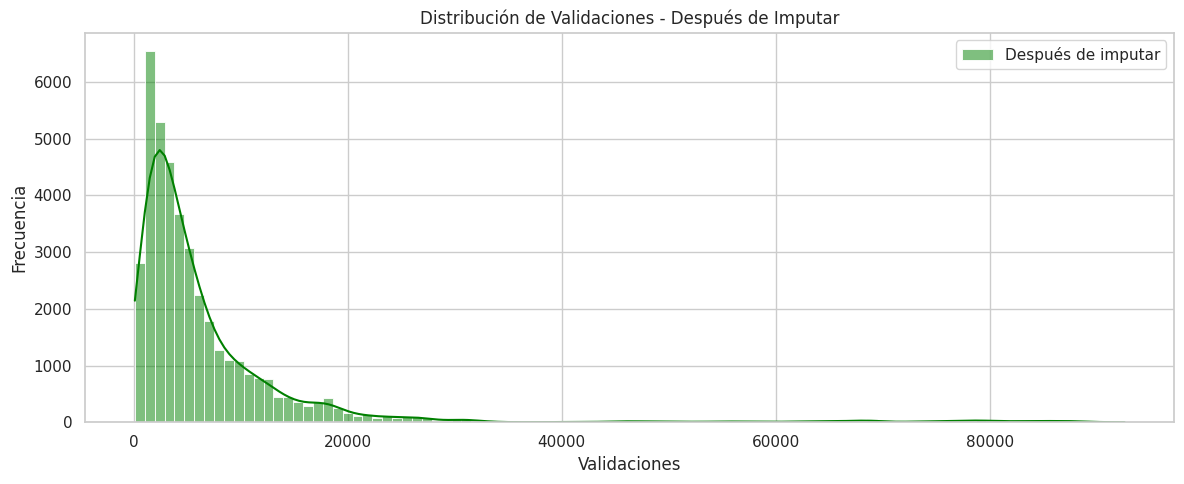

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un dataframe de comparaci√≥n
comparacion = pd.DataFrame({
    'validaciones_original': df['validaciones'],
    'validaciones_imputadas': df_imputado['validaciones_final']
})

# Histograma de antes
plt.figure(figsize=(12,5))
sns.histplot(comparacion['validaciones_original'], color='red', label='Antes de imputar', bins=100, kde=True)
plt.title('Distribuci√≥n de Validaciones - Antes de Imputar')
plt.xlabel('Validaciones')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

# Histograma de despu√©s
plt.figure(figsize=(12,5))
sns.histplot(comparacion['validaciones_imputadas'], color='green', label='Despu√©s de imputar', bins=100, kde=True)
plt.title('Distribuci√≥n de Validaciones - Despu√©s de Imputar')
plt.xlabel('Validaciones')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()


In [95]:
# Verificar si a√∫n hay ceros despu√©s de la imputaci√≥n
ceros_restantes = df_imputado[df_imputado['validaciones_final'] <= 0]

print(f"Registros con validaciones menores a 100 despu√©s de imputar: {len(ceros_restantes)}")
ceros_restantes[['fecha', 'estacion', 'Dia de Semana', 'validaciones', 'validaciones_final']]


Registros con validaciones menores a 100 despu√©s de imputar: 0


Empty DataFrame
Columns: [fecha, estacion, Dia de Semana, validaciones, validaciones_final]
Index: []

Como parte del proceso de limpieza y preparaci√≥n de datos, se identificaron registros con validaciones anormalmente bajas (menores a 100), lo cual no correspond√≠a a la operaci√≥n real del sistema Metropolitano de Lima. Estos valores fueron corregidos mediante un proceso de imputaci√≥n utilizando el promedio de validaciones correspondiente a cada estaci√≥n y d√≠a de la semana.

En la Figura se presenta la distribuci√≥n de las validaciones antes del proceso de imputaci√≥n. Se observa una alta concentraci√≥n de registros en valores extremadamente bajos, incluyendo m√∫ltiples ceros, lo cual refleja inconsistencias en los datos que podr√≠an afectar el an√°lisis predictivo posterior.

En la Figura se muestra la distribuci√≥n de validaciones despu√©s de la imputaci√≥n. Se evidencia una notable mejora en la consistencia de los datos: los valores an√≥malamente bajos fueron corregidos, y la distribuci√≥n resultante refleja de manera m√°s fiel la operaci√≥n real del sistema de transporte, manteniendo la heterogeneidad entre estaciones de alta y baja demanda.

Previo a la realizaci√≥n del an√°lisis exploratorio de datos (EDA), se llev√≥ a cabo un proceso de imputaci√≥n de registros an√≥malamente bajos. Esta correcci√≥n fue necesaria dado que los valores extremadamente peque√±os distorsionaban la visualizaci√≥n y la interpretaci√≥n de los patrones de demanda. Al imputar estos registros utilizando el promedio por estaci√≥n y d√≠a de la semana, se logr√≥ obtener una base de datos consistente que reflejara de manera m√°s precisa la din√°mica real del sistema, permitiendo as√≠ un an√°lisis exploratorio m√°s confiable.

El an√°lisis exploratorio de datos se realiz√≥ utilizando la variable validaciones_final, la cual refleja una base de datos depurada y consistente. Las visualizaciones permitieron identificar tendencias estacionales, variaciones semanales y relaciones relevantes entre eventos especiales y demanda de transporte, proporcionando informaci√≥n clave para el posterior modelado predictivo.

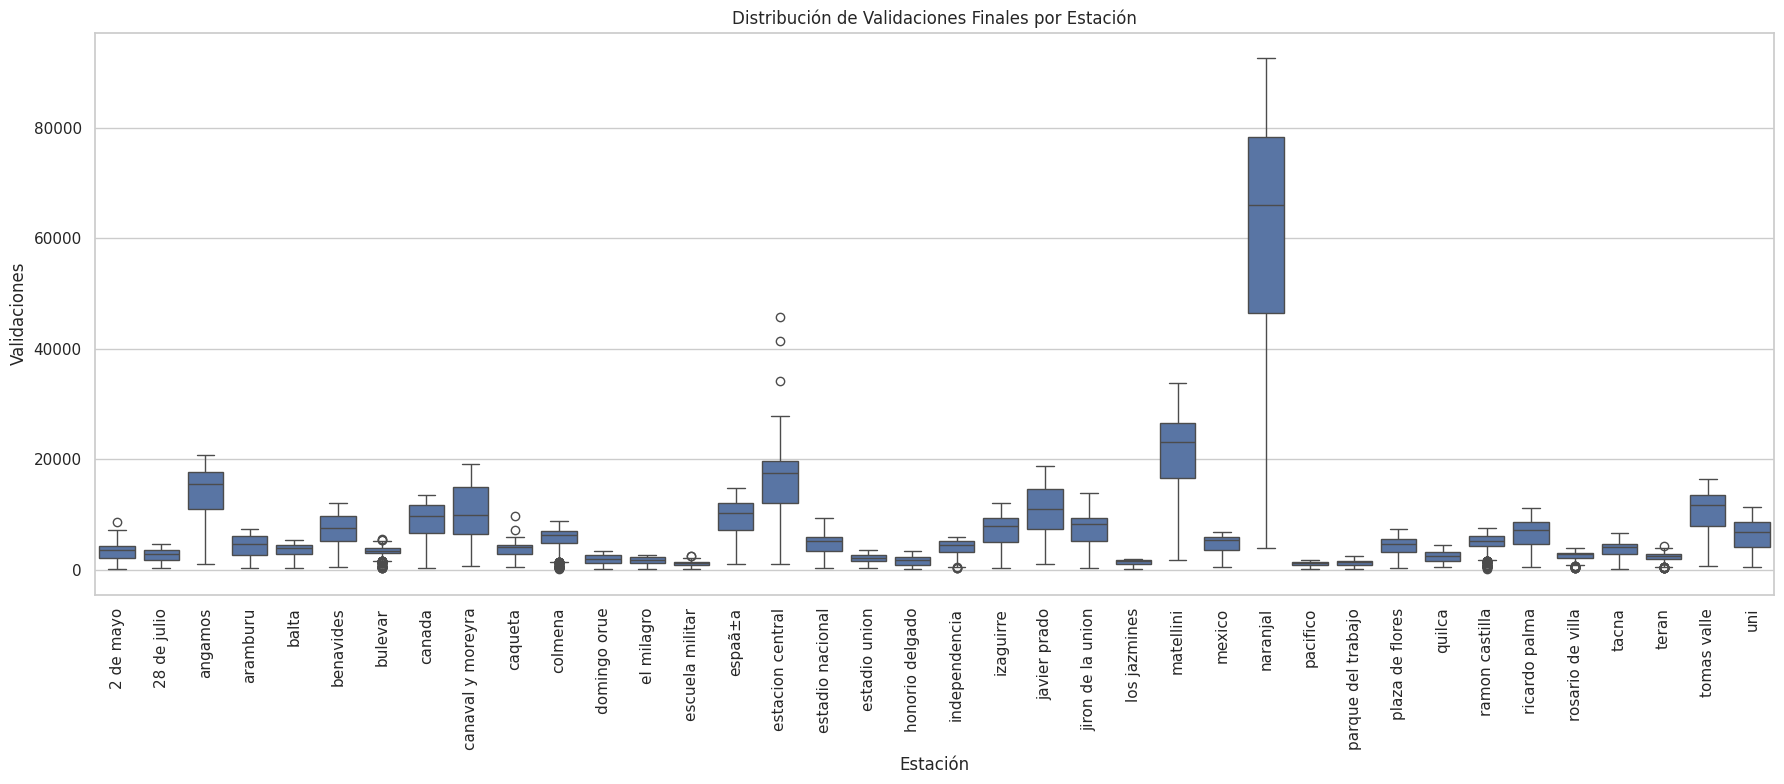

In [96]:
# Boxplot de validaciones por estaci√≥n
plt.figure(figsize=(18,8))
sns.boxplot(x='estacion', y='validaciones_final', data=df_imputado)
plt.xticks(rotation=90)
plt.title('Distribuci√≥n de Validaciones Finales por Estaci√≥n')
plt.xlabel('Estaci√≥n')
plt.ylabel('Validaciones')
plt.tight_layout()
plt.show()


El an√°lisis de la distribuci√≥n de validaciones finales por estaci√≥n (Figura X) revela una fuerte heterogeneidad en los niveles de demanda del sistema Metropolitano de Lima. Se observa que la estaci√≥n Naranjal concentra los mayores vol√∫menes de validaciones diarias, seguida por Estaci√≥n Central y Matellini, lo que confirma su rol como nodos principales de movilidad. En contraste, estaciones como Domingo Oru√©, Colmena o Tacna presentan vol√∫menes significativamente menores. La dispersi√≥n en estaciones de alta demanda refleja variaciones operativas normales, mientras que la menor dispersi√≥n en estaciones peque√±as indica una demanda m√°s estable. La presencia de outliers en algunas estaciones se atribuye a eventos especiales o d√≠as excepcionales.

Este gr√°fico nos muestra claramente la diferencia en los niveles de demanda entre estaciones. Naranjal destaca como el principal nodo de validaciones diarias, seguido por Estaci√≥n Central y Matellini. Adem√°s, vemos que muchas estaciones m√°s peque√±as tienen un patr√≥n mucho m√°s estable, lo cual refleja la estructura operativa jer√°rquica del Metropolitano.

In [97]:
# Primero, filtramos solo la estaci√≥n que quieres analizar (por ejemplo, "bulevar")
estacion_bulevar = df_imputado[df_imputado['estacion'].str.contains('bulevar', case=False)]

# Segundo, vemos la distribuci√≥n para detectar posibles outliers
Q1 = estacion_bulevar['validaciones_final'].quantile(0.25)
Q3 = estacion_bulevar['validaciones_final'].quantile(0.75)
IQR = Q3 - Q1

# Definir l√≠mites de outliers (regla de 1.5*IQR)
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"L√≠mites para considerar outliers en Bulevar: {limite_inferior:.2f} a {limite_superior:.2f}")

# Tercero, identificar registros que son outliers
outliers_bulevar = estacion_bulevar[
    (estacion_bulevar['validaciones_final'] < limite_inferior) |
    (estacion_bulevar['validaciones_final'] > limite_superior)
]

# Mostrar los outliers encontrados
outliers_bulevar[['fecha', 'validaciones_final', 'Dia de Semana']]


L√≠mites para considerar outliers en Bulevar: 1527.12 a 5212.12


fecha  validaciones_final Dia de Semana
6414 2021-01-31               396.0       domingo
6415 2021-02-01              1128.0         lunes
6416 2021-02-02              1187.0        martes
6417 2021-02-03              1182.0     mi√©rcoles
6418 2021-02-04              1222.0        jueves
6419 2021-02-05              1286.0       viernes
6420 2021-02-06              1218.0        s√°bado
6421 2021-02-07               433.0       domingo
6422 2021-02-08              1308.0         lunes
6423 2021-02-09              1295.0        martes
6424 2021-02-10              1376.0     mi√©rcoles
6425 2021-02-11              1344.0        jueves
6426 2021-02-12              1410.0       viernes
6427 2021-02-13              1496.0        s√°bado
6428 2021-02-14               579.0       domingo
6429 2021-02-15              1421.0         lunes
6430 2021-02-16              1398.0        martes
6431 2021-02-17              1412.0     mi√©rcoles
6432 2021-02-18              1408.0        jueves
6433 2021-02-19              1514.0       viernes
6434 2021-02-20              1517.0        s√°bado
6435 2021-02-21               626.0       domingo
6436 2021-02-22              1511.0         lunes
6437 2021-02-23              1479.0        martes
6438 2021-02-24              1499.0     mi√©rcoles
6439 2021-02-25              1473.0        jueves
6442 2021-02-28               783.0       domingo
6449 2021-03-07               228.0       domingo
6456 2021-03-14               279.0       domingo
6474 2021-04-01               472.0        jueves
6475 2021-04-02               436.0       viernes
6476 2021-04-03               825.0        s√°bado
6477 2021-04-04               512.0       domingo
6498 2021-04-25               275.0       domingo
6505 2021-05-02               316.0       domingo
6512 2021-05-09               476.0       domingo
6554 2021-06-20               571.0       domingo
6793 2022-02-14              5313.0         lunes
7121 2023-01-08              5318.0       domingo
7158 2023-02-14              5529.0        martes

Al analizar los valores at√≠picos en la estaci√≥n Bulevar, se identificaron registros de validaciones finales menores a 1527 durante los primeros meses de 2021. Estos valores bajos fueron evaluados en su contexto temporal, observ√°ndose que correspond√≠an a la fase inicial de recuperaci√≥n de la demanda tras restricciones de movilidad. Por lo tanto, dichos registros fueron considerados como representativos del comportamiento real del sistema y se conservaron en la base de datos para mantener la fidelidad de la serie temporal.

Al analizar los valores at√≠picos en la estaci√≥n Bulevar, se identificaron registros con validaciones finales menores a 1527, considerados outliers bajos. Estos registros corresponden a d√≠as espec√≠ficos donde la demanda fue anormalmente reducida, posiblemente por efectos de restricciones de movilidad, feriados o menor actividad general. No se detectaron outliers altos en esta estaci√≥n, indicando una operaci√≥n relativamente estable en t√©rminos de demanda elevada.

como gui√≥n: En estaciones como Bulevar, los valores considerados outliers bajos fueron revisados en su contexto temporal. Se determin√≥ que correspond√≠an a una etapa de recuperaci√≥n gradual de la demanda, por lo que se decidi√≥ conservarlos para no alterar la estructura real de los datos.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

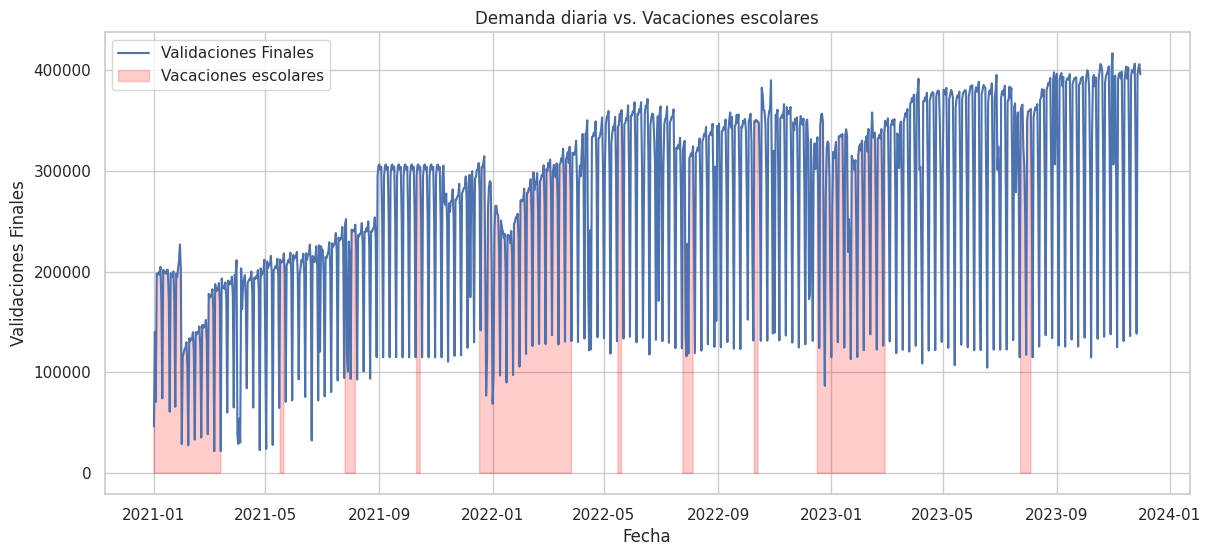

In [98]:
# Agrupar por fecha: suma de validaciones y si fue d√≠a de vacaciones escolares
serie_diaria = df_imputado.groupby('fecha').agg({
    'validaciones_final': 'sum',
    'vacaciones_escolares': 'max'
}).reset_index()

# Graficar: l√≠nea de demanda + sombra para vacaciones escolares
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(data=serie_diaria, x='fecha', y='validaciones_final', label='Validaciones Finales')
plt.fill_between(
    x=serie_diaria['fecha'],
    y1=0,
    y2=serie_diaria['validaciones_final'],
    where=serie_diaria['vacaciones_escolares'] == 1,
    color='red',
    alpha=0.2,
    label='Vacaciones escolares'
)
plt.title('Demanda diaria vs. Vacaciones escolares')
plt.xlabel('Fecha')
plt.ylabel('Validaciones Finales')
plt.legend()
plt.grid(True)
plt



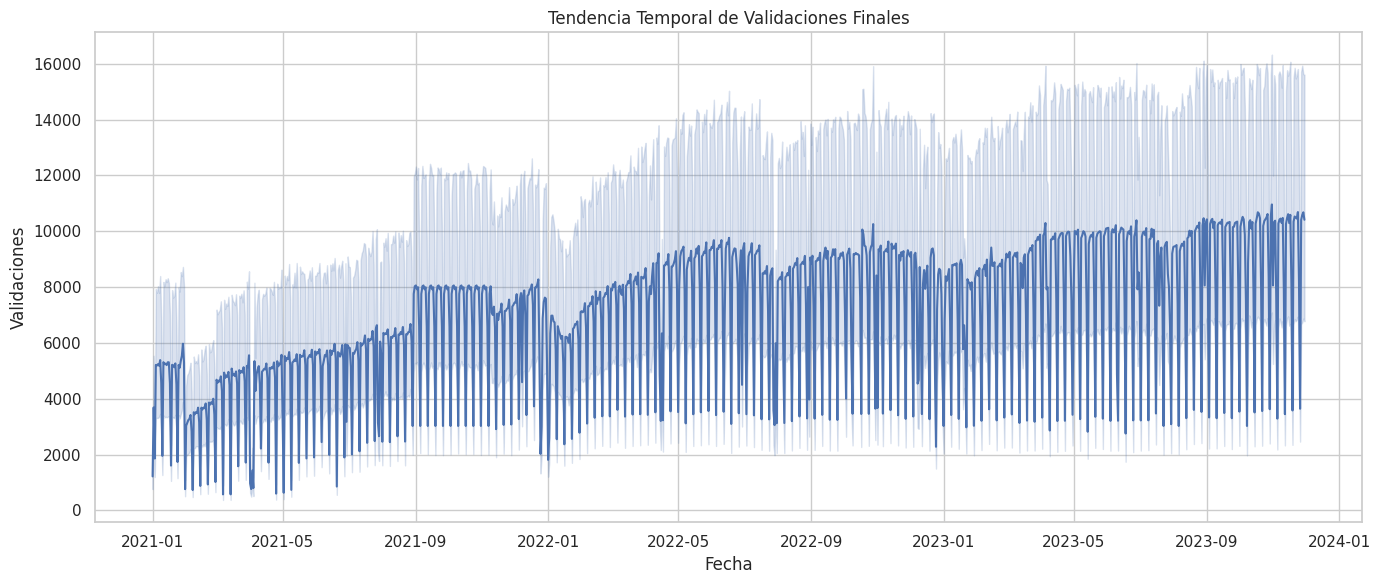

In [99]:
# An√°lisis temporal de la demanda

df_imputado_sorted = df_imputado.sort_values('fecha')

plt.figure(figsize=(14,6))
sns.lineplot(x='fecha', y='validaciones_final', data=df_imputado_sorted)
plt.title('Tendencia Temporal de Validaciones Finales')
plt.xlabel('Fecha')
plt.ylabel('Validaciones')
plt.tight_layout()
plt.show()


El an√°lisis temporal de las validaciones finales muestra una clara tendencia de crecimiento en la demanda de transporte p√∫blico desde inicios de 2021 hasta finales de 2023. Esta recuperaci√≥n progresiva refleja el retorno de las actividades presenciales tras las restricciones impuestas por la pandemia. Se identifica adem√°s un patr√≥n c√≠clico semanal, con mayor n√∫mero de validaciones en d√≠as laborables y ca√≠das en fines de semana. Variaciones estacionales adicionales, como descensos durante periodos de vacaciones escolares, tambi√©n son evidentes en la serie.

gui√≥n: Este gr√°fico de series temporales muestra c√≥mo la demanda de transporte ha crecido de manera sostenida desde 2021, con patrones semanales claramente marcados entre d√≠as h√°biles y fines de semana. Tambi√©n podemos identificar descensos estacionales que corresponden a vacaciones escolares o eventos especiales.

<ipython-input-100-8ac7459e1b59>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-100-8ac7459e1b59>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


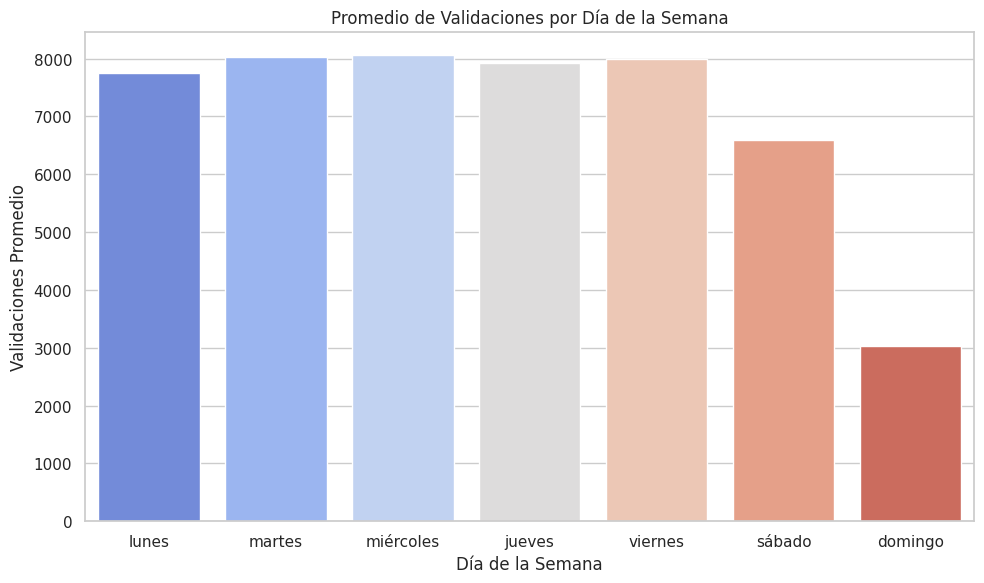

In [100]:
#Promedio de validaciones por d√≠a de la semana

import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que los d√≠as est√©n en orden correcto
dias_orden = ['lunes', 'martes', 'mi√©rcoles', 'jueves', 'viernes', 's√°bado', 'domingo']

# Crear gr√°fico de promedio de validaciones por d√≠a de la semana
plt.figure(figsize=(10,6))
sns.barplot(
    x='Dia de Semana',
    y='validaciones_final',
    data=df_imputado,
    order=dias_orden,
    estimator='mean',
    ci=None,
    palette='coolwarm'
)
plt.title('Promedio de Validaciones por D√≠a de la Semana')
plt.xlabel('D√≠a de la Semana')
plt.ylabel('Validaciones Promedio')
plt.tight_layout()
plt.show()


El an√°lisis del promedio de validaciones por d√≠a de la semana revela un patr√≥n consistente con el comportamiento t√≠pico de sistemas de transporte urbano. De lunes a viernes, la demanda se mantiene elevada y relativamente estable, asociada a actividades laborales y acad√©micas. Los s√°bados presentan una disminuci√≥n moderada en el volumen de validaciones, reflejando una reducci√≥n parcial de la actividad. En contraste, los domingos muestran la menor cantidad de validaciones promedio, coherente con la reducci√≥n generalizada de la movilidad urbana durante los d√≠as de descanso.

gui√≥n: El comportamiento semanal muestra que de lunes a viernes se mantiene un nivel alto de validaciones, asociado a actividades laborales y acad√©micas. Los s√°bados la demanda baja moderadamente y los domingos se reduce significativamente, siguiendo un patr√≥n de movilidad urbana t√≠pico.

<ipython-input-101-38226a7aa1c1>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mes', y='validaciones_final', data=df_imputado, ci=None, estimator='mean', palette='viridis')
<ipython-input-101-38226a7aa1c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='validaciones_final', data=df_imputado, ci=None, estimator='mean', palette='viridis')


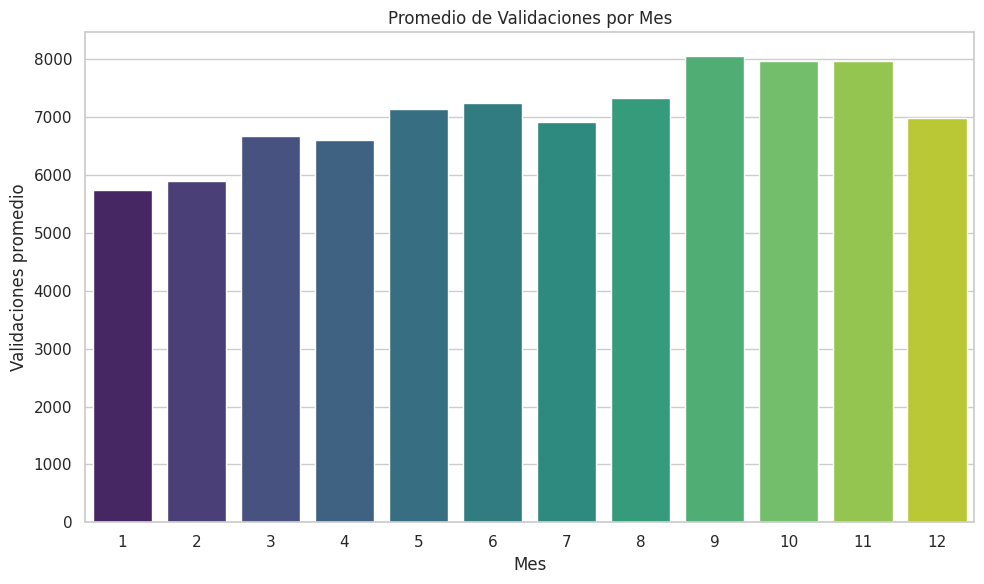

In [101]:
#Promedio de validaciones por mes

df_imputado['mes'] = df_imputado['fecha'].dt.month

plt.figure(figsize=(10,6))
sns.barplot(x='mes', y='validaciones_final', data=df_imputado, ci=None, estimator='mean', palette='viridis')
plt.title('Promedio de Validaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Validaciones promedio')
plt.tight_layout()
plt.show()

La figura muestra la distribuci√≥n promedio mensual de validaciones durante el periodo analizado. Se evidencia una menor demanda durante los meses de enero y diciembre, en concordancia con las vacaciones escolares y las festividades de fin de a√±o. Asimismo, julio presenta una ligera ca√≠da asociada al receso de medio a√±o. El resto del a√±o mantiene niveles elevados de validaciones, indicando una operaci√≥n constante del sistema en periodos regulares de actividad acad√©mica y laboral.

gui√≥n: El an√°lisis estacional muestra que la demanda cae en enero, julio y diciembre, lo cual coincide con los ciclos escolares y festivos. En los dem√°s meses, el sistema mantiene una operaci√≥n estable, reflejando una actividad urbana regular.

In [102]:
# Eliminar columna original
df_imputado = df_imputado.drop(columns=['validaciones'])

<ipython-input-103-992db5a12e12>:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


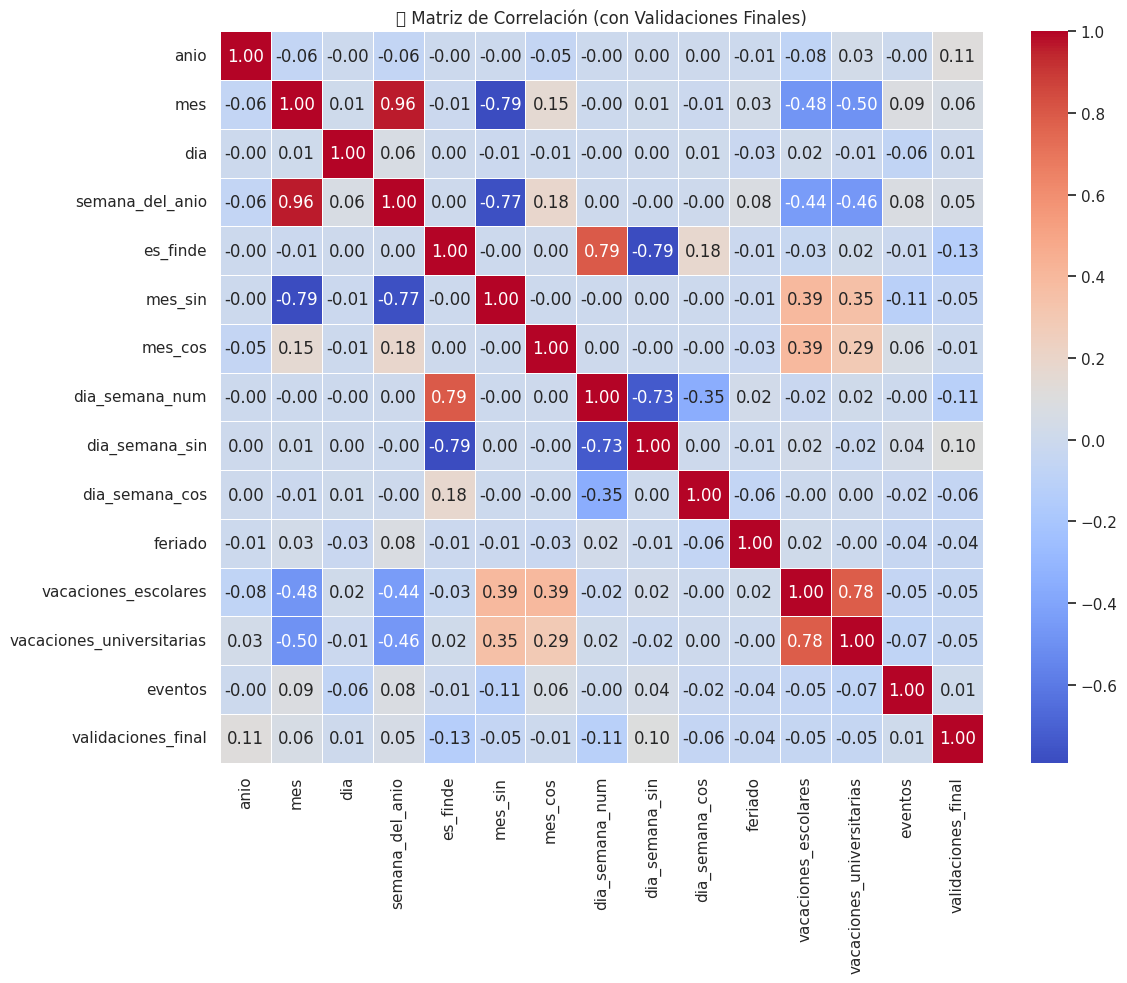

In [103]:
# Filtrar solo variables num√©ricas incluyendo validaciones_final
variables_numericas = df_imputado.select_dtypes(include=['number'])

# Calcular la matriz de correlaci√≥n
matriz_corr = variables_numericas.corr()

# Visualizar
plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('üîó Matriz de Correlaci√≥n (con Validaciones Finales)')
plt.tight_layout()
plt.show()


El an√°lisis de la matriz de correlaci√≥n evidencia relaciones d√©biles entre la variable objetivo (validaciones_final) y factores contextuales como feriados, eventos y periodos de vacaciones escolares o universitarias. Esta baja correlaci√≥n num√©rica se explica por la baja frecuencia de estos eventos en comparaci√≥n al volumen total de d√≠as analizados. Sin embargo, las visualizaciones temporales complementarias confirmaron el impacto de dichos factores en la demanda diaria. Adem√°s, se observ√≥ una alta correlaci√≥n entre vacaciones_escolares y vacaciones_universitarias, indicando la posible coincidencia de periodos de receso acad√©mico. Por √∫ltimo, las variables temporales (mes, semana_del_a√±o, mes_sin, mes_cos) mostraron correlaciones esperadas debido a su naturaleza c√≠clica, justificando su inclusi√≥n como codificaciones en el modelo de predicci√≥n.

gui√≥n: En la matriz de correlaci√≥n, aunque las variables de vacaciones y feriados presentan correlaciones num√©ricas bajas con la demanda, los gr√°ficos temporales muestran ca√≠das claras en estos periodos. Por eso, decidimos conservar estas variables en el modelo. Tambi√©n observamos que las variables de codificaci√≥n temporal est√°n correlacionadas entre s√≠, lo cual es esperado por la naturaleza c√≠clica del tiempo, y se manej√≥ mediante t√©cnicas adecuadas como codificaci√≥n sinusoidal.

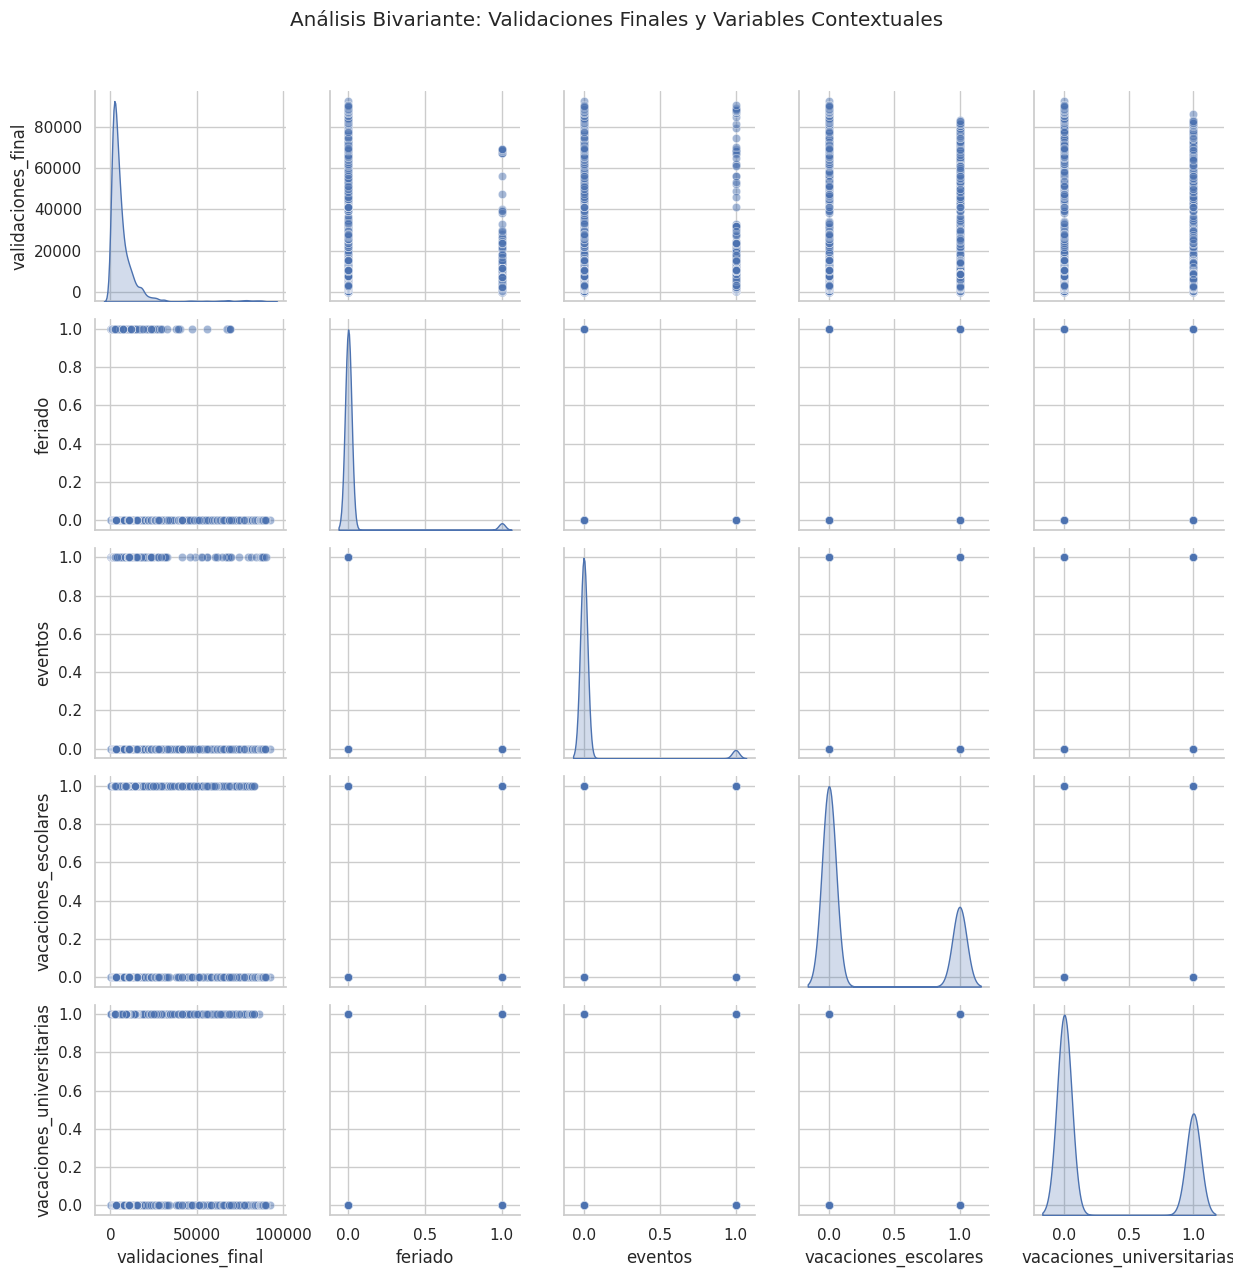

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables relevantes
subset = df_imputado[[
    'validaciones_final',
    'feriado',
    'eventos',
    'vacaciones_escolares',
    'vacaciones_universitarias'
]]

# Crear matriz de gr√°ficos de dispersi√≥n
sns.pairplot(subset, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('An√°lisis Bivariante: Validaciones Finales y Variables Contextuales', y=1.02)
plt.tight_layout()
plt.show()


El an√°lisis bivariante mediante gr√°ficos de dispersi√≥n mostr√≥ agrupamientos caracter√≠sticos en d√≠as feriados y periodos de vacaciones, donde las validaciones tienden a concentrarse en valores m√°s bajos. Aunque estas variables son binarias, el patr√≥n de disminuci√≥n en la demanda es visualmente evidente, lo que valida su inclusi√≥n en el modelo. En contraste, los eventos presentan una dispersi√≥n mayor, lo que sugiere un impacto localizado o variable.

gui√≥n: El an√°lisis bivariante mediante gr√°ficos de dispersi√≥n mostr√≥ agrupamientos caracter√≠sticos en d√≠as feriados y periodos de vacaciones, donde las validaciones tienden a concentrarse en valores m√°s bajos. Aunque estas variables son binarias, el patr√≥n de disminuci√≥n en la demanda es visualmente evidente, lo que valida su inclusi√≥n en el modelo. En contraste, los eventos presentan una dispersi√≥n mayor, lo que sugiere un impacto localizado o variable.

Aunque la variable eventos no muestra una relaci√≥n clara ni sistem√°tica con la demanda general, se decidi√≥ mantenerla en el conjunto de predictores por su posible impacto localizado en ciertos d√≠as o estaciones. Los modelos de redes neuronales utilizados son capaces de identificar patrones √∫tiles incluso en variables con alta dispersi√≥n, descartando su influencia si no resulta significativa.

gui√≥n: La variable de eventos fue incluida con precauci√≥n. Aunque no presenta un patr√≥n claro en toda la red, decid√≠ conservarla porque algunos eventos espec√≠ficos s√≠ podr√≠an alterar la demanda, y las redes neuronales que us√© son capaces de gestionar este tipo de variables contextuales sin que afecten negativamente al modelo.


# Preprocesamiento

In [105]:
# Fijar la semilla aleatoria
import numpy as np, tensorflow as tf, random, os
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [106]:
# Limpieza adicional - columnas que no usaremos en el an√°lisis.
df_imputado = df_imputado.drop(columns=['tipo_evento', 'Zona_geografica'], errors='ignore')
df_imputado = df_imputado.sort_values('fecha')

In [107]:
# Codificar la variable estacion (One-Hot Encoding)
df_original = df_imputado.copy()

df_imputado = pd.get_dummies(df_imputado, columns=['estacion'], prefix='est')

In [108]:
# Crear variable objetivo futura (t+1)
df_imputado['target_t1'] = df_imputado['validaciones_final'].shift(-1)
# Eliminar registros con target_t1 NULO
df_imputado = df_imputado.dropna(subset=['target_t1'])

Para la predicci√≥n de un horizonte t+1 se gener√≥ la variable target_t1 mediante un desplazamiento hacia el futuro de un d√≠a. Esta t√©cnica conserva la secuencia temporal intacta, lo cual es imprescindible en modelos de redes neuronales recurrentes como LSTM, GRU y RNN. No se aplicaron transformaciones por grupo (por estaci√≥n). Esta decisi√≥n responde a la naturaleza multivariada del enfoque adoptado, en el que se entrena un √∫nico modelo con datos de todas las estaciones combinadas. La variable estacion fue incorporada al modelo mediante codificaci√≥n categ√≥rica (One-Hot), lo que permite que la red neuronal identifique y aprenda patrones espec√≠ficos para cada estaci√≥n sin necesidad de segmentar las series. Agrupar por estaci√≥n antes del desplazamiento habr√≠a fragmentado la secuencia temporal global, afectando la capacidad del modelo para aprender la din√°mica general del sistema de transporte.

In [109]:
# Dividir en Train / Validation / Test
df_imputado['a√±o'] = df_imputado['fecha'].dt.year
train_df = df_imputado[df_imputado['fecha'] < '2023-01-01'].copy()
val_df   = df_imputado[(df_imputado['fecha'] >= '2023-01-01') & (df_imputado['fecha'] < '2023-10-01')].copy()
test_df  = df_imputado[df_imputado['fecha'] >= '2023-10-01'].copy()

In [110]:
# Crear el escalador y ajustarlo SOLO con el entrenamiento
from sklearn.preprocessing import MinMaxScaler
escalar_cols = ['validaciones_final', 'mes_sin', 'mes_cos', 'dia_semana_sin', 'dia_semana_cos']
scaler = MinMaxScaler()
scaler.fit(train_df[escalar_cols])  # aprende el rango solo con entrenamiento

# Aplicar transformaciones (sin volver a aprender)
train_df[escalar_cols] = scaler.transform(train_df[escalar_cols])
val_df[escalar_cols]   = scaler.transform(val_df[escalar_cols])
test_df[escalar_cols]  = scaler.transform(test_df[escalar_cols])

Solo se usa fit() con el entrenamiento para no introducir fuga de datos. Luego transform() aplica la misma l√≥gica a los datos futuros, manteniendo la coherencia."

Se aplic√≥ una serie de transformaciones al conjunto de datos imputado (df_imputado) para adecuarlo al entrenamiento de modelos predictivos. Esto incluy√≥ la fijaci√≥n de una semilla aleatoria para garantizar la reproducibilidad, la codificaci√≥n de la variable categ√≥rica estacion mediante One-Hot Encoding, el escalado de variables num√©ricas, la generaci√≥n de la variable objetivo desplazada (t+1), y la divisi√≥n cronol√≥gica en entrenamiento, validaci√≥n y prueba.

In [111]:
# Eliminar columnas no num√©ricas (object y datetime)
#train_df = train_df.drop(columns=train_df.select_dtypes(include=['object', 'datetime']).columns)
#val_df = val_df.drop(columns=val_df.select_dtypes(include=['object', 'datetime']).columns)
#test_df = test_df.drop(columns=test_df.select_dtypes(include=['object', 'datetime']).columns)

In [112]:
#train_df = train_df.astype('float32')
#val_df = val_df.astype('float32')
#test_df = test_df.astype('float32')

# Modelado

## PARTE A: MODELO ARIMA POR ESTACI√ìN (cl√°sico, baseline)

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Normaliza nombre de estaciones
df_original['estacion'] = df_original['estacion'].str.strip().str.lower()

# Lista para guardar resultados
resultados_arima = []

# Recorrer cada estaci√≥n
for est in df_original['estacion'].unique():
    df_est = df_original[df_original['estacion'] == est].sort_values('fecha')

    train = df_est[df_est['fecha'] < '2023-01-01']['validaciones_final']
    test = df_est[df_est['fecha'] >= '2023-01-01']['validaciones_final']

    try:
        model = ARIMA(train, order=(2, 1, 2))
        model_fit = model.fit()
        pred = model_fit.forecast(steps=len(test))

        mae = mean_absolute_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))

        resultados_arima.append({
            'estacion': est,
            'MAE': mae,
            'RMSE': rmse
        })
    except:
        print(f"Error en estaci√≥n: {est}")
        continue

# Convertir resultados a DataFrame
df_result_arima = pd.DataFrame(resultados_arima)
df_result_arima


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes o

estacion           MAE          RMSE
0            2 de mayo   1386.863513   1564.106989
1            benavides   2975.433714   3290.082203
2             naranjal  19218.055282  22113.994085
3                  uni   2653.404068   2944.804144
4             pacifico    269.981800    320.844823
5                balta    800.652248    870.372307
6   parque del trabajo    344.203080    391.111340
7      plaza de flores   1721.421025   1938.081503
8               quilca    872.041952    960.579953
9             aramburu   2058.933268   2153.772926
10      ramon castilla   1016.393470   1482.577640
11       ricardo palma   2016.773491   2241.383219
12             angamos   4522.845047   5085.805539
13    rosario de villa    489.479430    556.977148
14               tacna   1153.847010   1306.975215
15         28 de julio    977.501847   1073.071134
16              mexico   1118.712463   1366.261985
17               teran    461.949683    515.970444
18           matellini   6967.156321   7579.190592
19        los jazmines    290.864756    343.817442
20        domingo orue    837.078474    920.568503
21     escuela militar    374.483136    428.333222
22             espa√£¬±a   3196.738501   3570.712751
23    estacion central   4391.657411   5358.252632
24             colmena   1403.732164   1853.940800
25    estadio nacional   2210.608148   2434.578825
26       estadio union    466.023746    549.965623
27             caqueta    593.788395    820.221811
28     honorio delgado    992.686732   1113.273492
29       independencia   1143.692149   1353.638100
30   canaval y moreyra   6054.374118   6332.563785
31           izaguirre   2378.608174   2737.831692
32        javier prado   4894.516709   5393.992112
33              canada   2998.266347   3322.176514
34   jiron de la union   2273.185939   2637.737290
35             bulevar    391.656746    527.988241
36         tomas valle   2418.782591   2922.396247
37          el milagro    508.078828    563.939250

Los resultados de ARIMA mostraron un rendimiento razonable en estaciones con baja variabilidad de demanda, como 'Pac√≠fico' o 'Escuela Militar'. Sin embargo, en estaciones de alta afluencia como 'Naranjal' o 'Estaci√≥n Central', los errores fueron significativamente m√°s altos, evidenciando la limitada capacidad de ARIMA para adaptarse a din√°micas no lineales. Esto motiva la exploraci√≥n de modelos de redes neuronales, capaces de capturar patrones temporales m√°s complejos.

<ipython-input-54-19e9b06ee521>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='estacion', data=df_comparativo, palette='coolwarm')


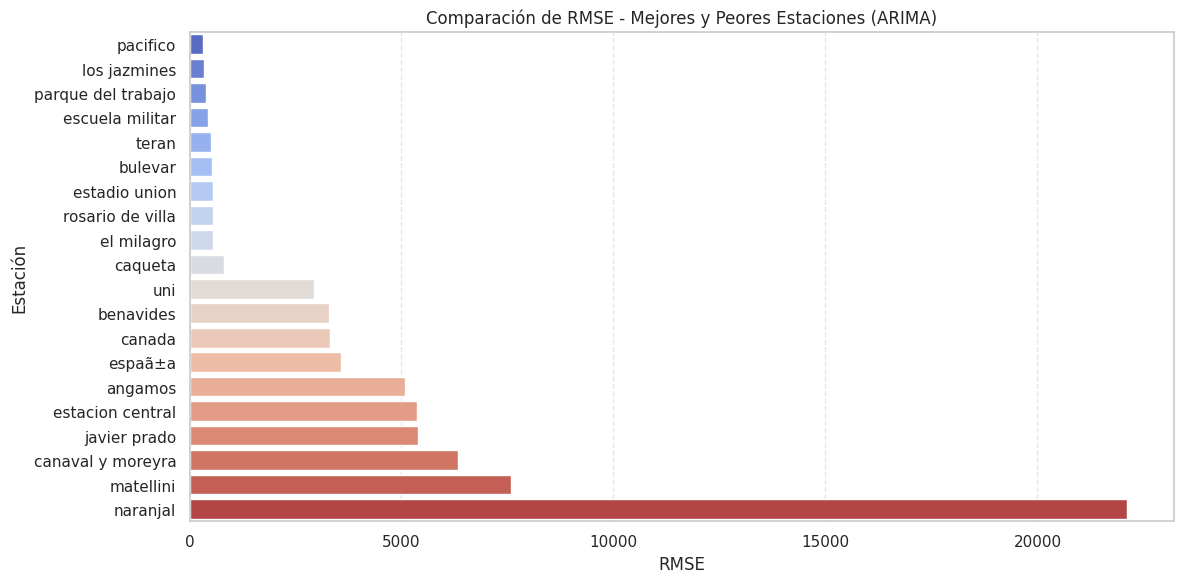

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aseg√∫rate de tener df_result_arima con columnas 'estacion' y 'RMSE'

# Ordenar por RMSE
df_result_arima_sorted = df_result_arima.sort_values(by='RMSE', ascending=True)

# Seleccionar top y bottom
top_10 = df_result_arima_sorted.head(10)
bottom_10 = df_result_arima_sorted.tail(10)

# Unir ambos para graficar
df_comparativo = pd.concat([top_10, bottom_10])

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x='RMSE', y='estacion', data=df_comparativo, palette='coolwarm')
plt.title('Comparaci√≥n de RMSE - Mejores y Peores Estaciones (ARIMA)')
plt.xlabel('RMSE')
plt.ylabel('Estaci√≥n')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


El an√°lisis de error por estaci√≥n revel√≥ una gran disparidad en el rendimiento del modelo ARIMA. Mientras que estaciones de menor demanda mostraron errores reducidos (ej. Pac√≠fico con RMSE ‚âà 320), estaciones de alta afluencia como Naranjal registraron errores superiores a 20,000 validaciones diarias. Esto refuerza la necesidad de modelos m√°s complejos que puedan capturar patrones no lineales, como las redes neuronales LSTM, GRU o RNN

<ipython-input-55-bccfb947190e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='estacion', data=df_comparativo_mae, palette='crest')


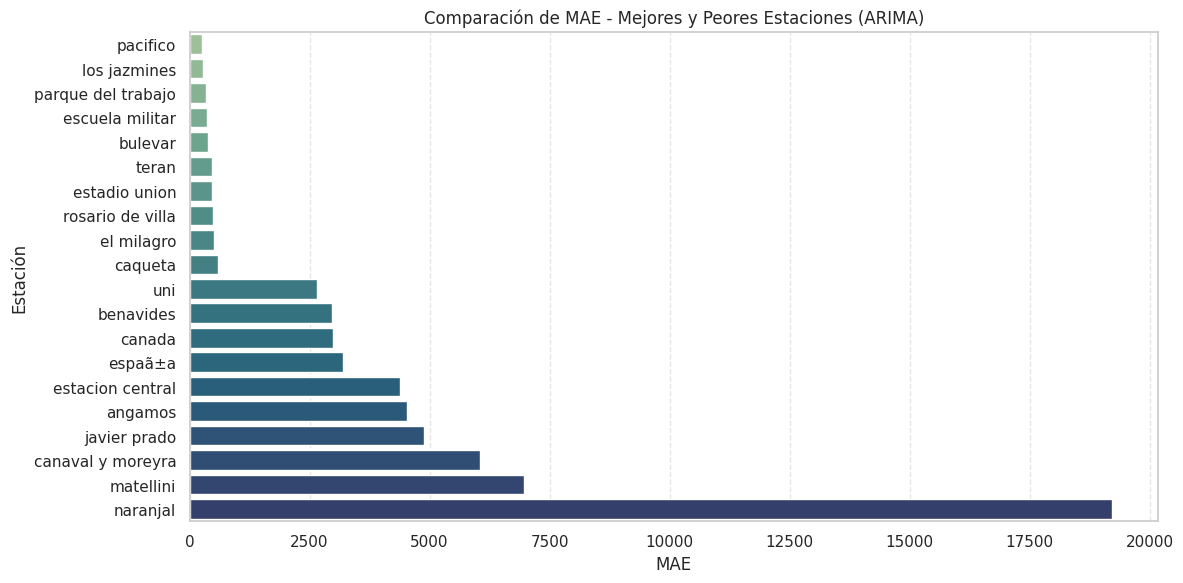

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aseg√∫rate de tener cargado el DataFrame df_result_arima con las columnas 'estacion' y 'MAE'

# Ordenar por MAE
df_result_arima_sorted_mae = df_result_arima.sort_values(by='MAE', ascending=True)

# Seleccionar top y bottom
top_10_mae = df_result_arima_sorted_mae.head(10)
bottom_10_mae = df_result_arima_sorted_mae.tail(10)

# Unir ambos en un solo DataFrame
df_comparativo_mae = pd.concat([top_10_mae, bottom_10_mae])

# Gr√°fico de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x='MAE', y='estacion', data=df_comparativo_mae, palette='crest')
plt.title('Comparaci√≥n de MAE - Mejores y Peores Estaciones (ARIMA)')
plt.xlabel('MAE')
plt.ylabel('Estaci√≥n')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Se observ√≥ que el modelo ARIMA present√≥ un desempe√±o aceptable en estaciones con menor variabilidad, alcanzando un MAE inferior a 500 validaciones diarias. Sin embargo, en estaciones de alta demanda como Naranjal, el MAE super√≥ los 19,000, lo que demuestra que el modelo no logra capturar adecuadamente sus patrones complejos. Esto refuerza la necesidad de modelos m√°s sofisticados, como redes neuronales.

## PARTE B: MODELOS RNN, LSTM, GRU (redes neuronales)

In [113]:
# =============================
# üß© Funci√≥n para crear ventanas de tiempo
# =============================
def crear_ventanas(df, n_lags, target_col):
    X, y = [], []
    features = df.drop(columns=[target_col]).values
    target = df[target_col].values
    for i in range(n_lags, len(df)):
        X.append(features[i - n_lags:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Convertir columnas booleanas a int
for df in [train_df, val_df, test_df]:
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype('int32')

# Guardar fechas antes de eliminar columnas no num√©ricas
fechas_test = test_df['fecha'].reset_index(drop=True)

# Eliminar columnas no num√©ricas (object y datetime)
for df in [train_df, val_df, test_df]:
    df.drop(columns=df.select_dtypes(include=['object', 'datetime']).columns, inplace=True)

# Verificar tipos finales
print("üö® Tipos despu√©s de limpieza:")
print(train_df.dtypes)

# Crear ventanas
n_lags = 7  # ventana de 7 d√≠as
X_train, y_train = crear_ventanas(train_df, n_lags, 'target_t1')
X_val, y_val     = crear_ventanas(val_df, n_lags, 'target_t1')
X_test, y_test   = crear_ventanas(test_df, n_lags, 'target_t1')

# =============================
# üîÅ Definir modelos LSTM, GRU, RNN con EarlyStopping
# =============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def construir_modelo_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_gru(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

# =============================
# üìà Entrenar y evaluar modelos con EarlyStopping
# =============================
def entrenar_y_evaluar(model_func, X_train, y_train, X_val, y_val, X_test, y_test, nombre):
    model = model_func(X_train.shape[1:])
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f"{nombre} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return model

# Ejecutar comparaciones
modelo_lstm = entrenar_y_evaluar(construir_modelo_lstm, X_train, y_train, X_val, y_val, X_test, y_test, "LSTM")
modelo_gru  = entrenar_y_evaluar(construir_modelo_gru, X_train, y_train, X_val, y_val, X_test, y_test, "GRU")
modelo_rnn  = entrenar_y_evaluar(construir_modelo_rnn, X_train, y_train, X_val, y_val, X_test, y_test, "RNN")


üö® Tipos despu√©s de limpieza:
anio                           int64
mes                            int32
dia                            int64
semana_del_anio                int64
es_finde                       int64
mes_sin                      float64
mes_cos                      float64
dia_semana_num                 int32
dia_semana_sin               float64
dia_semana_cos               float64
feriado                        int64
vacaciones_escolares           int64
vacaciones_universitarias      int64
eventos                        int64
validaciones_final           float64
est_2 de mayo                  int32
est_28 de julio                int32
est_angamos                    int32
est_aramburu                   int32
est_balta                      int32
est_benavides                  int32
est_bulevar                    int32
est_canada                     int32
est_canaval y moreyra          int32
est_caqueta                    int32
est_colmena                    int32
est_d

73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step


<ipython-input-115-419db591048d>:16: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


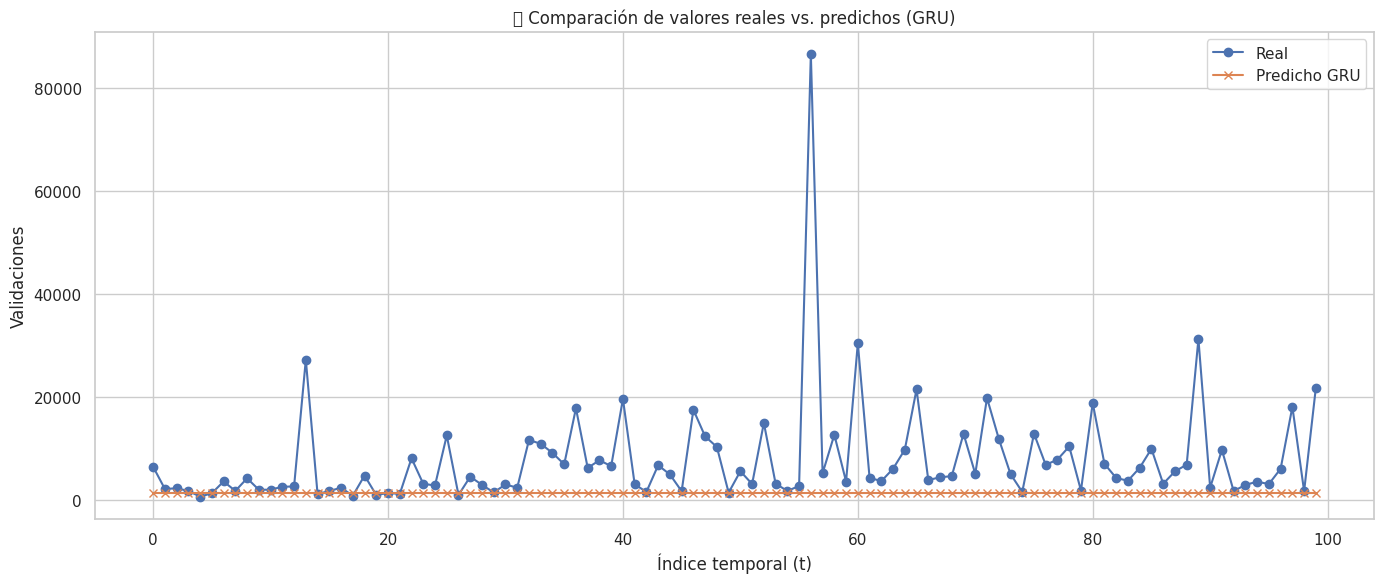

In [115]:
import matplotlib.pyplot as plt

# Aseg√∫rate de haber predicho previamente
pred_gru = modelo_gru.predict(X_test)

# Visualizar 100 puntos (puedes cambiar ese valor)
n = 100
plt.figure(figsize=(14, 6))
plt.plot(y_test[:n], label='Real', marker='o')
plt.plot(pred_gru[:n], label='Predicho GRU', marker='x')
plt.title("üîé Comparaci√≥n de valores reales vs. predichos (GRU)")
plt.xlabel("√çndice temporal (t)")
plt.ylabel("Validaciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:
# =============================
# Escalar el target (solo con train)
# =============================
scaler_target = MinMaxScaler()
train_df['target_t1_scaled'] = scaler_target.fit_transform(train_df[['target_t1']])
val_df['target_t1_scaled']   = scaler_target.transform(val_df[['target_t1']])
test_df['target_t1_scaled']  = scaler_target.transform(test_df[['target_t1']])

# =============================
# Funci√≥n para crear ventanas de tiempo
# =============================
def crear_ventanas(df, n_lags, target_col):
    X, y = [], []
    features = df.drop(columns=[target_col]).values
    target = df[target_col].values
    for i in range(n_lags, len(df)):
        X.append(features[i - n_lags:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Crear ventanas
n_lags = 7  # ventana de 7 d√≠as
X_train, y_train = crear_ventanas(train_df, n_lags, 'target_t1_scaled')
X_val, y_val     = crear_ventanas(val_df, n_lags, 'target_t1_scaled')
X_test, y_test   = crear_ventanas(test_df, n_lags, 'target_t1_scaled')

# =============================
# üîÅ Definir modelos LSTM, GRU, RNN con EarlyStopping
# =============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def construir_modelo_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_gru(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

# =============================
# üìà Entrenar y evaluar modelos con EarlyStopping y desescalado
# =============================
def entrenar_y_evaluar(model_func, X_train, y_train, X_val, y_val, X_test, y_test, nombre):
    model = model_func(X_train.shape[1:])
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)
    pred = model.predict(X_test)
    pred_desescalado = scaler_target.inverse_transform(pred)
    y_test_desescalado = scaler_target.inverse_transform(y_test.reshape(-1, 1))
    mae = mean_absolute_error(y_test_desescalado, pred_desescalado)
    rmse = np.sqrt(mean_squared_error(y_test_desescalado, pred_desescalado))
    print(f"{nombre} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return model

# Ejecutar comparaciones
modelo_lstm = entrenar_y_evaluar(construir_modelo_lstm, X_train, y_train, X_val, y_val, X_test, y_test, "LSTM")
modelo_gru  = entrenar_y_evaluar(construir_modelo_gru, X_train, y_train, X_val, y_val, X_test, y_test, "GRU")
modelo_rnn  = entrenar_y_evaluar(construir_modelo_rnn, X_train, y_train, X_val, y_val, X_test, y_test, "RNN")

73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step
LSTM - MAE: 6188.21, RMSE: 13999.41
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
GRU - MAE: 6087.46, RMSE: 13746.62
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
RNN - MAE: 6196.15, RMSE: 13863.27


73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step
Na√Øve  ‚Äì MAE: 9598.94, RMSE: 18611.92, MAPE: 176.3%
GRU    ‚Äì MAE: 6087.46, RMSE: 13746.62, MAPE: 78.6%


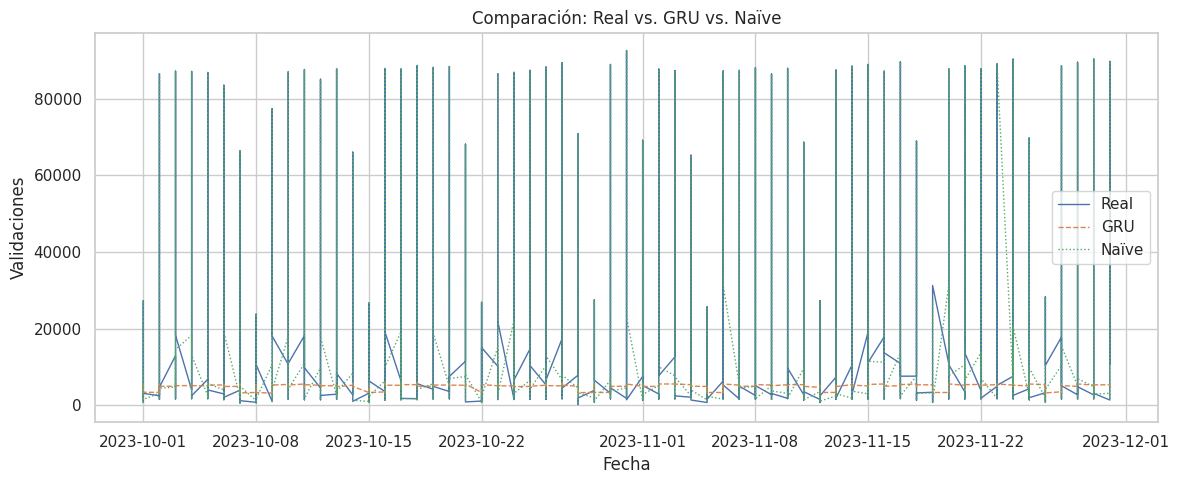

In [121]:
# 1) Vuelve a predecir y desescalar en el scope global
pred = modelo_gru.predict(X_test)
pred_desescalado = scaler_target.inverse_transform(pred)               # shape (N,1)
y_test_desescalado = scaler_target.inverse_transform(y_test.reshape(-1,1))  # shape (N,1)

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- 1) Prepara los vectores "verdadero" y "predicci√≥n" sin lag ---
# y_test_desescalado: shape (N,1), pred_desescalado: shape (N,1)
y_true = y_test_desescalado.flatten()       # (N,)
y_pred = pred_desescalado.flatten()         # (N,)

# --- 2) Baseline Na√Øve simple (valor del d√≠a anterior) ---
naive_pred   = y_true[:-1]      # del √≠ndice 0 a N-2
y_true_cut   = y_true[1:]       # del √≠ndice 1 a N-1

# --- 3) M√©tricas del na√Øve ---
mae_naive  = mean_absolute_error(y_true_cut, naive_pred)
rmse_naive = np.sqrt(mean_squared_error(y_true_cut, naive_pred))
mape_naive = np.mean(np.abs((y_true_cut - naive_pred) / y_true_cut)) * 100

print(f"Na√Øve  ‚Äì MAE: {mae_naive:.2f}, RMSE: {rmse_naive:.2f}, MAPE: {mape_naive:.1f}%")

# --- 4) M√©tricas de tu modelo ---
mae_model  = mean_absolute_error(y_true, y_pred)
rmse_model = np.sqrt(mean_squared_error(y_true, y_pred))
mape_model = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"GRU    ‚Äì MAE: {mae_model:.2f}, RMSE: {rmse_model:.2f}, MAPE: {mape_model:.1f}%")

# --- 5) Gr√°fica comparativa ---
# Prepara eje de fechas compatible con el na√Øve (se desplaza 1 paso)
fechas_plot = fechas_test.iloc[n_lags+1 :].reset_index(drop=True)

plt.figure(figsize=(12,5))
plt.plot(fechas_plot, y_true_cut,    label="Real",    linewidth=1)
plt.plot(fechas_plot, y_pred[1:],    label="GRU",     linestyle='--', linewidth=1)
plt.plot(fechas_plot, naive_pred,    label="Na√Øve",   linestyle=':', linewidth=1)
plt.title("Comparaci√≥n: Real vs. GRU vs. Na√Øve")
plt.xlabel("Fecha")
plt.ylabel("Validaciones")
plt.legend()
plt.tight_layout()
plt.show()


In [122]:
import pandas as pd
corr = train_df.drop(columns=['target_t1','target_t1_scaled']).corrwith(train_df['target_t1'])
print(corr.sort_values(ascending=False))

anio                         0.108638
a√±o                          0.108638
dia_semana_sin               0.089725
mes                          0.078199
semana_del_anio              0.070322
validaciones_final           0.025185
est_ramon castilla           0.014503
est_balta                    0.014232
est_los jazmines             0.010863
est_honorio delgado          0.009671
est_tomas valle              0.009053
est_quilca                   0.008153
est_28 de julio              0.007949
est_estadio nacional         0.007766
est_aramburu                 0.005934
est_pacifico                 0.005325
est_plaza de flores          0.004894
eventos                      0.004272
est_bulevar                  0.004180
dia                          0.004175
est_ricardo palma            0.003705
est_estadio union            0.003360
est_javier prado             0.003110
mes_cos                      0.002140
est_uni                      0.001875
est_colmena                  0.001697
est_rosario

In [86]:
# =============================
# Escalar el target (solo con train)
# =============================
scaler_target = MinMaxScaler()
train_df['target_t1_scaled'] = scaler_target.fit_transform(train_df[['target_t1']])
val_df['target_t1_scaled']   = scaler_target.transform(val_df[['target_t1']])
test_df['target_t1_scaled']  = scaler_target.transform(test_df[['target_t1']])

# =============================
# Funci√≥n para crear ventanas de tiempo
# =============================
def crear_ventanas(df, n_lags, target_col):
    X, y = [], []
    features = df.drop(columns=[target_col]).values
    target = df[target_col].values
    for i in range(n_lags, len(df)):
        X.append(features[i - n_lags:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Crear ventanas
n_lags = 7  # ventana de 7 d√≠as
X_train, y_train = crear_ventanas(train_df, n_lags, 'target_t1_scaled')
X_val, y_val     = crear_ventanas(val_df, n_lags, 'target_t1_scaled')
X_test, y_test   = crear_ventanas(test_df, n_lags, 'target_t1_scaled')

# =============================
# üîÅ Definir modelos LSTM, GRU, RNN con EarlyStopping
# =============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def construir_modelo_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(128))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_gru(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(GRU(128))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(128))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

# =============================
# üìà Entrenar y evaluar modelos con EarlyStopping y desescalado
# =============================
def entrenar_y_evaluar(model_func, X_train, y_train, X_val, y_val, X_test, y_test, nombre):
    model = model_func(X_train.shape[1:])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)
    pred = model.predict(X_test)
    pred_desescalado = scaler_target.inverse_transform(pred)
    y_test_desescalado = scaler_target.inverse_transform(y_test.reshape(-1, 1))
    mae = mean_absolute_error(y_test_desescalado, pred_desescalado)
    rmse = np.sqrt(mean_squared_error(y_test_desescalado, pred_desescalado))
    print(f"{nombre} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return model

# Ejecutar comparaciones
modelo_lstm = entrenar_y_evaluar(construir_modelo_lstm, X_train, y_train, X_val, y_val, X_test, y_test, "LSTM")
modelo_gru  = entrenar_y_evaluar(construir_modelo_gru, X_train, y_train, X_val, y_val, X_test, y_test, "GRU")
modelo_rnn  = entrenar_y_evaluar(construir_modelo_rnn, X_train, y_train, X_val, y_val, X_test, y_test, "RNN")

73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step
LSTM - MAE: 6120.11, RMSE: 13825.64
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
GRU - MAE: 6117.23, RMSE: 13813.79
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
RNN - MAE: 6327.41, RMSE: 14076.75


In [125]:
pip install keras-tuner --upgrade

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [127]:
import keras_tuner as kt
from keras_tuner import HyperParameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 0) Definimos un objeto hp global y registramos batch_size ah√≠
hp = HyperParameters()
hp.Choice("batch_size", [16, 32, 64])

def model_builder(hp):
    model = Sequential()
    model.add(Input(shape=X_train.shape[1:]))

    # 1) Tipo de c√©lula recurrente
    cell_type = hp.Choice("cell_type", ["LSTM", "GRU", "RNN"])

    # 2) Unidades primera capa
    units_1 = hp.Int("units_1", min_value=32, max_value=128, step=32)

    # 3) ¬øDevolvemos secuencias para capa apilada?
    return_seq = hp.Boolean("return_sequences")

    # A√±ade la capa recurrente elegida
    if cell_type == "LSTM":
        model.add(LSTM(units_1, return_sequences=return_seq))
    elif cell_type == "GRU":
        model.add(GRU(units_1, return_sequences=return_seq))
    else:
        model.add(SimpleRNN(units_1, return_sequences=return_seq))

    # 4) Capa recurrente adicional (opcional)
    if return_seq:
        units_2 = hp.Int("units_2", min_value=16, max_value=64, step=16)
        if cell_type == "LSTM":
            model.add(LSTM(units_2))
        elif cell_type == "GRU":
            model.add(GRU(units_2))
        else:
            model.add(SimpleRNN(units_2))

    # 5) Dropout
    model.add(Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))

    # 6) Capa de salida
    model.add(Dense(1, activation="linear"))

    # 7) Optimizer & lr
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer=Adam(learning_rate=lr), loss="mae")

    return model

# 2. Configura el tuner pasando hp como hyperparameters
tuner = kt.RandomSearch(
    model_builder,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=1,
    hyperparameters=hp,           # <‚Äî aqu√≠
    allow_new_entries=True,
    directory="tuner_logs",
    project_name="rnn_gru_lstm_tuning"
)

# 3. Ejecuta la b√∫squeda. Ahora batch_size viene de hp.get(...)
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=hp.get("batch_size"),  # <‚Äî usa hp.get()
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)]
)

# 4. Recupera los mejores hiperpar√°metros
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Mejores hyperpar√°metros:", best_hp.values)

# 5. Entrena el mejor modelo final
best_model = tuner.hypermodel.build(best_hp)
best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=best_hp.get("batch_size"),  # guarda el batch √≥ptimo
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)],
    verbose=1
)

# 6. Eval√∫a en test
pred = best_model.predict(X_test)
pred_des = scaler_target.inverse_transform(pred)
y_test_des = scaler_target.inverse_transform(y_test.reshape(-1,1))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_des, pred_des)
print(f"Best model MAE en test: {mae:.2f}")


Trial 20 Complete [00h 03m 15s]
val_loss: 0.0654028058052063

Best val_loss So Far: 0.06477860361337662
Total elapsed time: 01h 33m 56s
Mejores hyperpar√°metros: {'batch_size': 32, 'cell_type': 'GRU', 'units_1': 32, 'return_sequences': True, 'dropout': 0.0, 'lr': 0.00020535161011692922, 'units_2': 64}
Epoch 1/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 14ms/step - loss: 0.1362 - val_loss: 0.0672
Epoch 2/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 14ms/step - loss: 0.0529 - val_loss: 0.0655
Epoch 3/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 14ms/step - loss: 0.0523 - val_loss: 0.0661
Epoch 4/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 13ms/step - loss: 0.0524 - val_loss: 0.0664
Epoch 5/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 14ms/step - loss: 0.0525 - val_loss: 0.0653
Epoch 6/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [128]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1) Define your model builder as before
def model_builder(hp):
    model = Sequential()
    model.add(Input(shape=X_train.shape[1:]))

    # Tipo de c√©lula recurrente
    cell_type = hp.Choice("cell_type", ["LSTM", "GRU", "RNN"])

    # Unidades primera capa
    units_1 = hp.Int("units_1", min_value=32, max_value=128, step=32)

    # ¬øDevolver secuencias para capa apilada?
    return_seq = hp.Boolean("return_sequences")

    if cell_type == "LSTM":
        model.add(LSTM(units_1, return_sequences=return_seq))
    elif cell_type == "GRU":
        model.add(GRU(units_1, return_sequences=return_seq))
    else:
        model.add(SimpleRNN(units_1, return_sequences=return_seq))

    # Capa recurrente adicional (opcional)
    if return_seq:
        units_2 = hp.Int("units_2", min_value=16, max_value=64, step=16)
        if cell_type == "LSTM":
            model.add(LSTM(units_2))
        elif cell_type == "GRU":
            model.add(GRU(units_2))
        else:
            model.add(SimpleRNN(units_2))

    # Dropout
    model.add(Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))

    # Salida
    model.add(Dense(1, activation="linear"))

    # Optimizer & learning rate
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer=Adam(learning_rate=lr), loss="mae")

    return model

# 2) Configura el tuner con Bayesian Optimization
tuner = kt.BayesianOptimization(
    model_builder,
    objective="val_loss",
    max_trials=20,               # ajusta si quieres probar m√°s combinaciones
    directory="tuner_logs",
    project_name="rnn_bayes_opt"
)

# 3) Lanza la b√∫squeda
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,               # puedes fijar batch_size o tunearlo por separado
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)]
)

# 4) Obt√©n los mejores hiperpar√°metros
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hyperpar√°metros:", best_hp.values)

# 5) Construye y entrena el modelo final
best_model = tuner.hypermodel.build(best_hp)
best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,               # o usa best_hp.get("batch_size") si lo hubieras tunedo
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)],
    verbose=1
)

# 6) Eval√∫a en test
pred = best_model.predict(X_test)
pred_des = scaler_target.inverse_transform(pred)
y_test_des = scaler_target.inverse_transform(y_test.reshape(-1,1))

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae  = mean_absolute_error(y_test_des, pred_des)
mse = mean_squared_error(y_test_des, pred_des)
rmse = np.sqrt(mse)
print(f"Best model (Bayesian) ‚Äì MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Trial 20 Complete [00h 02m 31s]
val_loss: 0.06477336585521698

Best val_loss So Far: 0.06457442045211792
Total elapsed time: 00h 46m 30s
Mejores hyperpar√°metros: {'cell_type': 'LSTM', 'units_1': 64, 'return_sequences': True, 'dropout': 0.30000000000000004, 'lr': 0.00016380858201924686, 'units_2': 16}
Epoch 1/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 11ms/step - loss: 0.1325 - val_loss: 0.0665
Epoch 2/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 12ms/step - loss: 0.0571 - val_loss: 0.0652
Epoch 3/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 12ms/step - loss: 0.0525 - val_loss: 0.0650
Epoch 4/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 12ms/step - loss: 0.0515 - val_loss: 0.0648
Epoch 5/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 12ms/step - loss: 0.0512 - val_loss: 0.0648
Epoch 6/50
867/867 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

TypeError: got an unexpected keyword argument 'squared'